Author: Ken Hafizh

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
df = pd.read_csv("/content/loan_customer.csv")
df.head()

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,NaN,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,NaN,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,NaN,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,NaN,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,NaN,house,APPROVE


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             621 non-null    object 
 1   birth_date          572 non-null    object 
 2   phone_number        569 non-null    float64
 3   gender              608 non-null    object 
 4   married             618 non-null    object 
 5   dependents          605 non-null    object 
 6   education           620 non-null    object 
 7   self_employed       588 non-null    object 
 8   applicant_income    612 non-null    float64
 9   coapplicant_income  621 non-null    float64
 10  loan_amount         621 non-null    int64  
 11  loan_term_month     621 non-null    int64  
 12  loan_term_year      621 non-null    int64  
 13  credit_history      570 non-null    float64
 14  has_credit_card     88 non-null     object 
 15  property_type       620 non-null    object 
 16  loan_sta

# Data Cleansing

## Handling missing values

In [4]:
df.isnull().sum()

loan_id                 0
birth_date             49
phone_number           52
gender                 13
married                 3
dependents             16
education               1
self_employed          33
applicant_income        9
coapplicant_income      0
loan_amount             0
loan_term_month         0
loan_term_year          0
credit_history         51
has_credit_card       533
property_type           1
loan_status             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             621 non-null    object 
 1   birth_date          572 non-null    object 
 2   phone_number        569 non-null    float64
 3   gender              608 non-null    object 
 4   married             618 non-null    object 
 5   dependents          605 non-null    object 
 6   education           620 non-null    object 
 7   self_employed       588 non-null    object 
 8   applicant_income    612 non-null    float64
 9   coapplicant_income  621 non-null    float64
 10  loan_amount         621 non-null    int64  
 11  loan_term_month     621 non-null    int64  
 12  loan_term_year      621 non-null    int64  
 13  credit_history      570 non-null    float64
 14  has_credit_card     88 non-null     object 
 15  property_type       620 non-null    object 
 16  loan_sta

In [7]:
df['birth_date']= pd.to_datetime(df['birth_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   loan_id             621 non-null    object        
 1   birth_date          572 non-null    datetime64[ns]
 2   phone_number        569 non-null    float64       
 3   gender              608 non-null    object        
 4   married             618 non-null    object        
 5   dependents          605 non-null    object        
 6   education           620 non-null    object        
 7   self_employed       588 non-null    object        
 8   applicant_income    612 non-null    float64       
 9   coapplicant_income  621 non-null    float64       
 10  loan_amount         621 non-null    int64         
 11  loan_term_month     621 non-null    int64         
 12  loan_term_year      621 non-null    int64         
 13  credit_history      570 non-null    float64       

In [8]:
df['phone_number'] = df['phone_number'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   loan_id             621 non-null    object        
 1   birth_date          572 non-null    datetime64[ns]
 2   phone_number        621 non-null    object        
 3   gender              608 non-null    object        
 4   married             618 non-null    object        
 5   dependents          605 non-null    object        
 6   education           620 non-null    object        
 7   self_employed       588 non-null    object        
 8   applicant_income    612 non-null    float64       
 9   coapplicant_income  621 non-null    float64       
 10  loan_amount         621 non-null    int64         
 11  loan_term_month     621 non-null    int64         
 12  loan_term_year      621 non-null    int64         
 13  credit_history      570 non-null    float64       

In [9]:
df.isnull().sum()

loan_id                 0
birth_date             49
phone_number            0
gender                 13
married                 3
dependents             16
education               1
self_employed          33
applicant_income        9
coapplicant_income      0
loan_amount             0
loan_term_month         0
loan_term_year          0
credit_history         51
has_credit_card       533
property_type           1
loan_status             0
dtype: int64

In [10]:
df.drop('has_credit_card', axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   loan_id             621 non-null    object        
 1   birth_date          572 non-null    datetime64[ns]
 2   phone_number        621 non-null    object        
 3   gender              608 non-null    object        
 4   married             618 non-null    object        
 5   dependents          605 non-null    object        
 6   education           620 non-null    object        
 7   self_employed       588 non-null    object        
 8   applicant_income    612 non-null    float64       
 9   coapplicant_income  621 non-null    float64       
 10  loan_amount         621 non-null    int64         
 11  loan_term_month     621 non-null    int64         
 12  loan_term_year      621 non-null    int64         
 13  credit_history      570 non-null    float64       

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

loan_id               0
birth_date            0
phone_number          0
gender                0
married               0
dependents            0
education             0
self_employed         0
applicant_income      0
coapplicant_income    0
loan_amount           0
loan_term_month       0
loan_term_year        0
credit_history        0
property_type         0
loan_status           0
dtype: int64

## Handling duplicated data

In [14]:
df.duplicated().sum()

5

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

0

## Handling Outlier

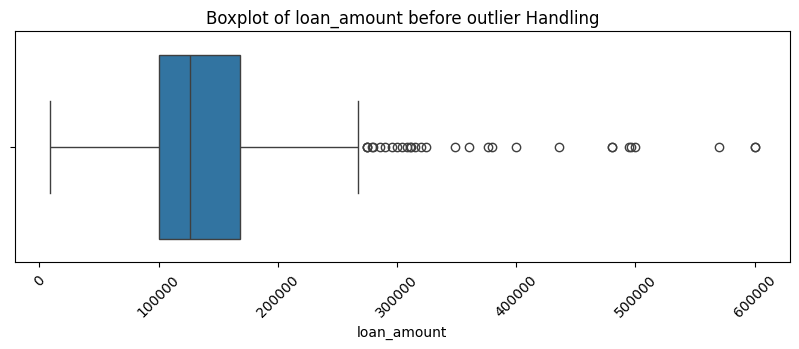

In [17]:
plt.figure(figsize=(10,3))

sns.boxplot(x='loan_amount', data=df)
plt.title('Boxplot of loan_amount before outlier Handling')
plt.xticks(rotation=45)
plt.show()

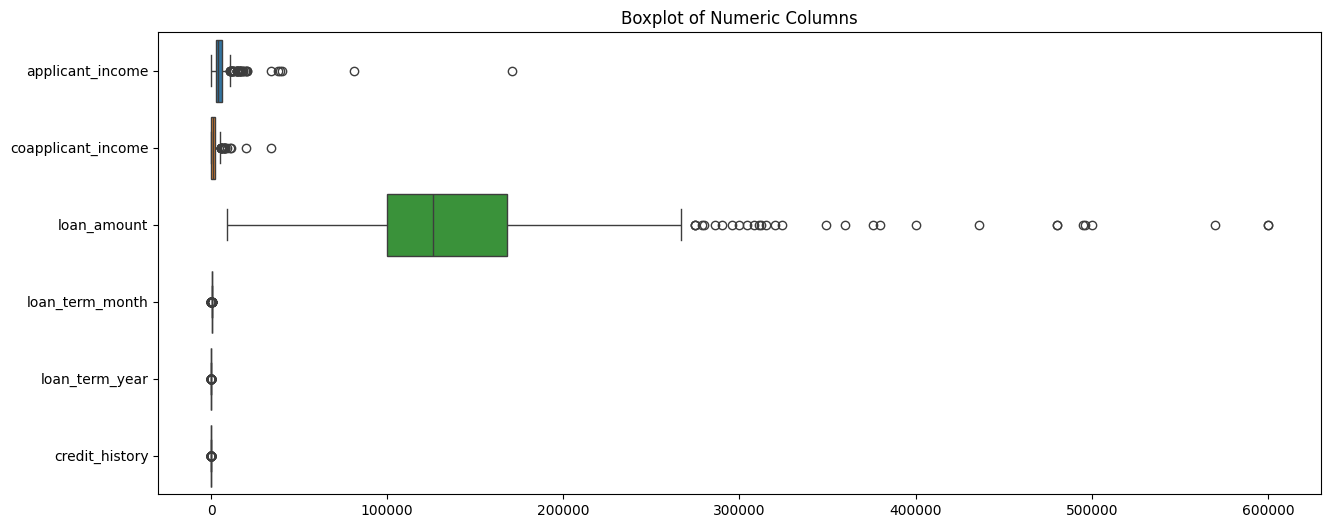

In [18]:
#melihat outlier dengan boxplot untuk semua tabel
numeric_columns = ['applicant_income', 'coapplicant_income', 'loan_amount', 'loan_term_month', 'loan_term_year', 'credit_history']

plt.figure(figsize=(15,6))

#mengubah boxplot menjadi horizontal
sns.boxplot(data=df[numeric_columns], orient='h')

plt.title('Boxplot of Numeric Columns')
plt.xticks(rotation=0)
plt.show()

In [19]:
#implementasi IQR untuk outlier handling menggunakan for
cols_to_check = ['applicant_income', 'coapplicant_income', 'loan_amount', 'loan_term_month', 'loan_term_year', 'credit_history']

for col in cols_to_check:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  low_limit = Q1 - 1.5 * IQR
  high_limit = Q3 + 1.5 * IQR

  df = df[(df[col] >- low_limit) & (df[col] <= high_limit)]

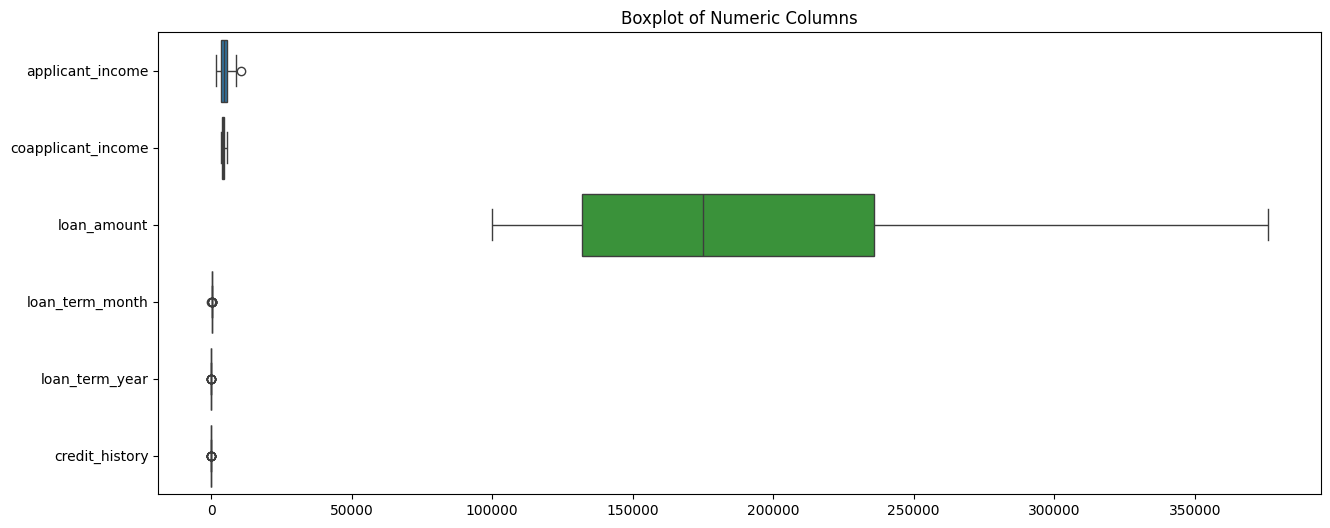

In [20]:
#Setelah outlier handling

numeric_columns = ['applicant_income', 'coapplicant_income', 'loan_amount', 'loan_term_month', 'loan_term_year', 'credit_history']

plt.figure(figsize=(15,6))

#mengubah boxplot menjadi horizontal
sns.boxplot(data=df[numeric_columns], orient='h')

plt.title('Boxplot of Numeric Columns')
plt.xticks(rotation=0)
plt.show()

## Feature Encoding

In [22]:
# cek dulu nilai unique masing masing kolom
df1 = df.copy()

In [23]:
# membuat daftar nama kolom yang bertipe kategorikal
cats = ['gender', 'married', 'dependents', 'education', 'self_employed', 'property_type']

# melihat kategori dari setiap kolom
for i in cats:
  print('Kolom', i, df[i].unique())

Kolom gender ['Male' 'Female']
Kolom married ['Yes' 'No']
Kolom dependents ['2' '1' '0' '3+']
Kolom education ['Graduate' 'Not Graduate']
Kolom self_employed ['Yes' 'No']
Kolom property_type ['house' 'studio' 'apartment']


In [24]:
# Mapping manual
mapping_gender = {
    'Male' : 0,
    'Female': 1
}

sampling_married = {
    'No' : 0,
    'Yes' : 1
}

mapping_dependents = {
    '0' : 0,
    '1' : 1,
    '2' : 2,
    '3' : 3
}

mapping_education = {
    'Not_Graduate' : 0,
    'Graduate' : 1
}

mapping_self_employed = {
    'No' : 0,
    'Yes' : 1
}

mapping_property_type = {
    'house' : 0,
    'studio' : 1,
    'apartment' : 2
}

df1['gender'] = df1['gender'].map(mapping_gender)
df1['married'] = df1['married'].map(sampling_married)
df1['dependents'] = df1['dependents'].map(mapping_dependents)
df1['education'] = df1['education'].map(mapping_education)
df1['self_employed'] = df1['self_employed'].map(mapping_self_employed)
df1['property_type'] = df1['gender'].map(mapping_property_type)

df1.head()



,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,property_type,loan_status
5,LP001011,1986-01-22,62811028825.0,0,1,2.0,1.0,1,5417.0,4196.0,267000,360,30,1.0,NaN,APPROVE
21,LP001046,1984-06-25,628521909126.0,0,1,1.0,1.0,0,5955.0,5625.0,315000,360,30,1.0,NaN,APPROVE
48,LP001146,1988-05-04,628131634557.0,1,1,0.0,1.0,0,2645.0,3440.0,120000,360,30,0.0,NaN,REJECT
60,LP001205,1980-05-27,628528628392.0,0,1,0.0,1.0,0,2500.0,3796.0,120000,360,30,1.0,NaN,APPROVE
62,LP001207,1982-07-10,628774531403.0,0,1,0.0,NaN,1,2609.0,3449.0,165000,180,15,0.0,NaN,REJECT


# Business Insight

## Analisis minat pelanggan berdasarkan pada tipe properti

In [26]:
df_gr1 = df.groupby(['gender', 'property_type'])['loan_id'].count().reset_index()
df_gr1

,gender,property_type,loan_id
0,Female,apartment,1
1,Female,house,1
2,Male,apartment,14
3,Male,house,9
4,Male,studio,16


In [27]:
df_gr1.columns = ['gender', 'property_type', 'count']
df_gr1

,gender,property_type,count
0,Female,apartment,1
1,Female,house,1
2,Male,apartment,14
3,Male,house,9
4,Male,studio,16


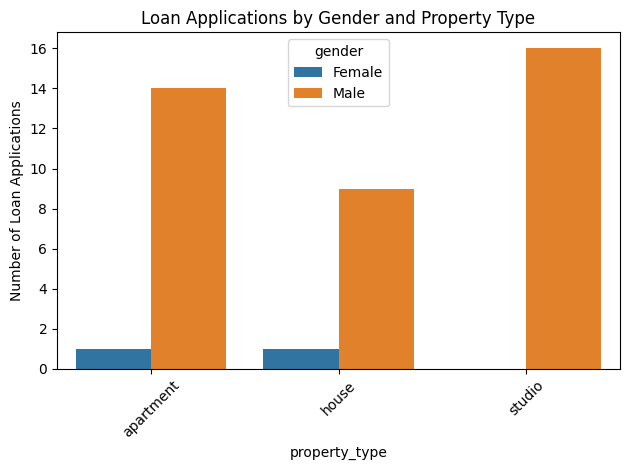

In [28]:
sns.barplot(x="property_type", y="count", hue="gender", data=df_gr1)


plt.xlabel("property_type")
plt.ylabel("Number of Loan Applications")
plt.title("Loan Applications by Gender and Property Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

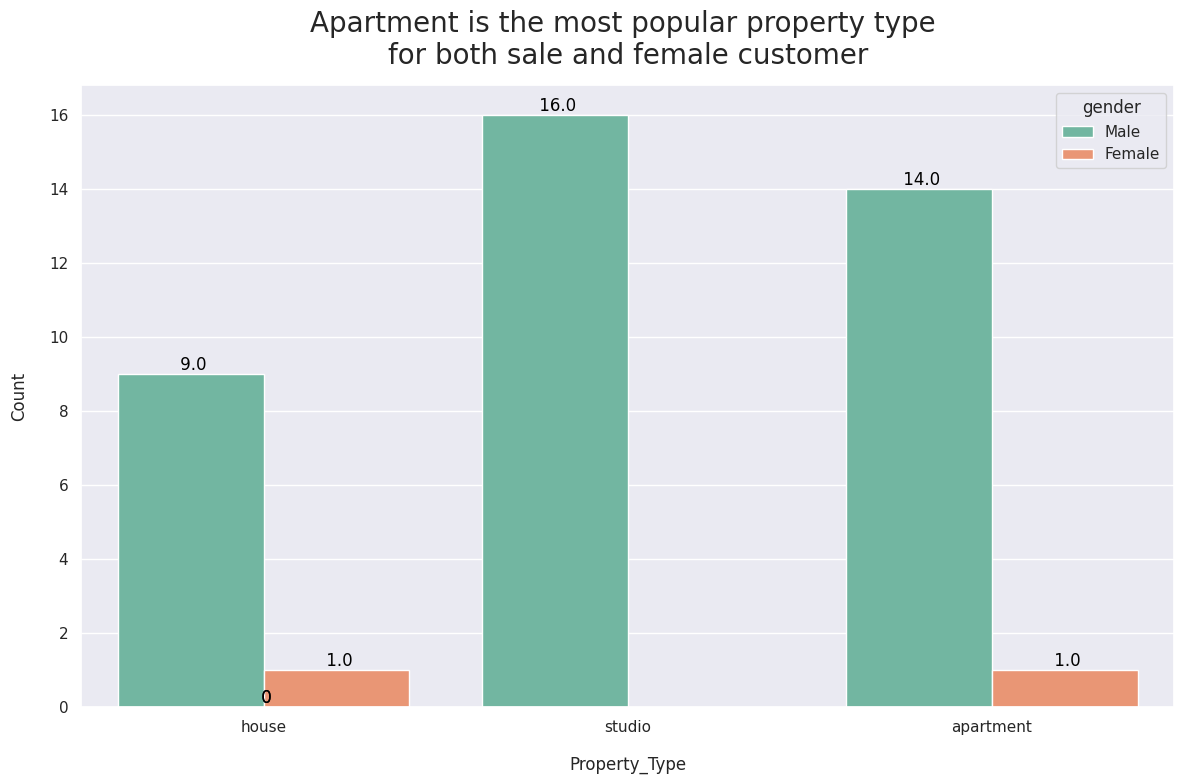

In [29]:
sns.set(style="darkgrid")
f, ax = plt.subplots(1,1,figsize=(12,8))
sns.countplot(x = "property_type", data = df, hue = 'gender', palette = "Set2")

for bar in ax.patches:
  bar_value = bar.get_height()
  text = f' {bar_value:,}'
  text_x = bar.get_x() + bar.get_width() / 2
  text_y = bar.get_y() + bar_value
  bar_color = bar.get_facecolor()
  ax.text(text_x, text_y, text, ha='center', va='bottom', color='black', size=12)

ax.set_xlabel('Property_Type', labelpad=15)
ax.set_ylabel('Count', labelpad=15)
ax.set_title('Apartment is the most popular property type \nfor both sale and female customer', pad=15, size=20)
plt.tight_layout()
plt.savefig('Analyze_the_behavior_of_loan_property_customer_01.png', dpi=200);

## Analisis pengaruh status perkawinan terhadap jangka waktu meminjam

In [30]:
df_gr2 = df.groupby(['married', 'loan_term_year'])['loan_id'].count().reset_index()
df_gr2.columns = ['married', 'loan_term_year', 'number_of_applicant']
df_gr2

,married,loan_term_year,number_of_applicant
0,No,5,1
1,No,30,10
2,Yes,15,5
3,Yes,25,1
4,Yes,30,24
